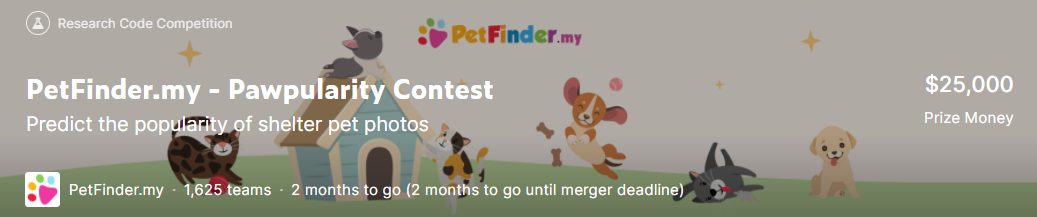

## 自分用のEDAをいつも作成しています。レベル的には非常に低いです。
## 少しは他の人の役に立つとよいかと思って公開しています。

> 写真は千の言葉の価値があります。しかし、あなたは写真が千人の命を救うことができることを知っていましたか？世界中で毎日、何百万もの野良動物が路上で苦しんでいるか、避難所で安楽死させられています。あなたは魅力的な写真を持ったペットがより多くの興味を生み出し、より早く養子縁組されることを期待するかもしれません。しかし、何が良い絵になるのでしょうか？データサイエンスの助けを借りて、ペットの写真の魅力を正確に判断し、これらの救助動物に家を愛する可能性を高めるための改善を提案することさえできるかもしれません。
> 
> PetFinder.myは、マレーシアを代表する動物福祉プラットフォームであり、18万匹以上の動物を飼育し、54,000匹が喜んで養子縁組されています。 PetFinderは、動物愛好家、メディア、企業、グローバル組織と緊密に協力して、動物福祉を向上させています。
> 
> 現在、PetFinder.myは基本的なかわいさメーターを使用してペットの写真をランク付けしています。何千ものペットプロファイルのパフォーマンスと比較して、画像の構成やその他の要因を分析します。この基本的なツールは役に立ちますが、まだ実験段階であり、アルゴリズムは改善される可能性があります。
> 
> このコンテストでは、生の画像とメタデータを分析して、ペットの写真の「Pawpularity」を予測します。 PetFinder.myの何千ものペットプロファイルでモデルをトレーニングしてテストします。受賞バージョンは、動物福祉を向上させる正確な推奨事項を提供します。
> 
> 成功した場合、ソリューションはAIツールに適応され、世界中の避難所や救助者がペットのプロフィールの魅力を向上させ、写真の品質を自動的に向上させ、構図の改善を推奨します。その結果、野良犬や野良猫は「熱狂的な」家をはるかに早く見つけることができます。 Kaggleコミュニティからの少しの支援で、多くの貴重な命が救われ、より幸せな家族が生まれました。

> このコンテストでは、あなたの仕事は、ペットのプロフィールの写真に基づいて、そのプロフィールとの関わりを予測することです。


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import seaborn as sns

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">Train.csv</span>

In [ ]:
train = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')
train

> Subject Focus 焦点-ペットは整頓された背景に対して際立っており、近すぎたり遠すぎたりすることはありません。<br>
> Eyes 目-両方の目が正面または正面近くを向いており、少なくとも1つの目/瞳孔が適切にクリアされています。<br>
> Face 顔-正面または正面近くを向いた、きちんとクリアな顔。<br>
> Near 近く-写真のかなりの部分を占める1匹のペット（写真の幅または高さの約50％以上）。<br>
> Action アクション-アクション（ジャンプなど）の途中でペットを飼う。<br>
> Accessory 付属品-付属の物理的またはデジタル付属品/支柱（おもちゃ、デジタルステッカーなど）、首輪と鎖を除く。<br>
> Group	 グループ-写真に写っているペットが1匹以上。<br>
> Collage コラージュ-デジタルレタッチされた写真（つまり、デジタルフォトフレーム、複数の写真の組み合わせ）。<br>
> Human 人間-写真の中の人間。<br>
> Occlusion オクルージョン-ペットの一部をブロックする特定の望ましくないオブジェクト（人間、ケージ、柵など）。すべてのブロッキングオブジェクトがオクルージョンと見なされるわけではないことに注意してください。<br>
> Info 情報-カスタム追加されたテキストまたはラベル（つまり、ペットの名前、説明）。<br>
> Blur ぼやけ-特にペットの目や顔の焦点がはっきりしていないか、ノイズが多い。ぼかしエントリの場合、「目」列は常に0に設定されます<br>
各ペットの写真には、各項目について1（はい）または0（いいえ）の値のラベルが付けられています。

> 
> <u>Pawpularity これを予測します。</u>

> これらのラベルは、Pawpularityスコアの導出には使用されませんが、コンテンツをよりよく理解し、写真の魅力と相互に関連付けるのに役立つ場合があります。私たちの最終目標は、インテリジェントな推奨事項（つまり、正面のペットの顔を近づける、アクセサリーを追加する、被写体の焦点を上げるなど）と写真の自動強調（つまり、明るさ、コントラスト）を生成できるAIソリューションを展開することです。より簡単に解釈できる予測。<br>

　　　⇒これらのデータはあまり深く追求しても意味ないよ、ということかな。

> <u>Pawpularityスコアの導出方法</u><br>
> Pawpularityスコアは、さまざまなページ、プラットフォーム（Webおよびモバイル）およびさまざまなメトリックにわたるトラフィックデータを正規化するアルゴリズムを使用して、リストページでの各ペットプロファイルのページビュー統計から導出されます。
> 重複クリック、クローラーボットアクセス、スポンサー付きプロファイルは分析から除外されます。

　　⇒これをどう予測するのか。写真だけで予測できるものなのか。。

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">test.csv</span>

In [ ]:
test = pd.read_csv('../input/petfinder-pawpularity-score/test.csv')
test

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">sample_submission</span>

In [ ]:
pd.read_csv('../input/petfinder-pawpularity-score/sample_submission.csv')

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">Trainフォルダ</span>

### まずは１ファイル見てみましょう

In [ ]:
train.loc[0,'Id']

In [ ]:
data = cv2.imread('../input/petfinder-pawpularity-score/train/0007de18844b0dbbb5e1f607da0606e0.jpg')
plt.imshow(data)

この画像のPawpularityは63。

### いくつかみないとわかりませんね。

In [ ]:
import glob
fig = plt.figure(figsize=(30,20))
x=1
for i in range(20):
    file = glob.glob('../input/petfinder-pawpularity-score/train/{}.jpg'.format(train.loc[i,'Id']))
    data = cv2.imread(file[0])
    fig.add_subplot(4, 5, x)
    plt.imshow(data)
    plt.title(train.loc[i,'Pawpularity'])
    x+=1

### この写真の中だと、100が一番大きく、2が一番小さい。
### いつものことながら、見てもなにを評価しているかわかりません。
### 静止画像なのでいつものようにEfficinetNETでのアプローチからかなあ。

## <span style="color: orange; font-family: Segoe UI; font-size: 1.0em; font-weight: 100;">Testフォルダ</span>

In [ ]:
fig = plt.figure(figsize=(30,20))
x=1
for i in range(7):
    file = glob.glob('../input/petfinder-pawpularity-score/test/{}.jpg'.format(test.loc[i,'Id']))
    data = cv2.imread(file[0])
    fig.add_subplot(4, 5, x)
    plt.imshow(data)
    x+=1

### 完全に動作確認用のデータですね。